# Resonance frequencies of a metal cylindrical cantilever -- import multiple FFT files and compute Young's modulus

Here we import FFT files created in another program (e.g., cantilever_read-mem-prime_single_file_create-fft_v5.ipynb). The files can be read in and analyzed to make an estimate of Young's modulus.

What happens here:

* show FFT for multiple analyzed files
* analyze spectrum -- e.g., find peak position, (estimate Q-factor)
* extract Young's modulus from fitting the data
* estimate fundamental resonance frequency using a formula

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:
# list the filenames 
# file_number_max_idx = 5
# filenames = ['A{:04d}'.format(x) for x in [1,2,3,6]]
file_dir = './data/'
fileNumbers = [1,2,3,4]
# fileNumbers = [10]
filenames = ['A{:04d}'.format(x) for x in fileNumbers]

In [3]:
filenames[:]

['A0001', 'A0002', 'A0003', 'A0004']

In [4]:
# # this is a procedural approach to loading data

# fft_data = {}

# for filename in filenames[:]:
#     data = np.genfromtxt('FFT_{}.txt'.format(filename),
#                          delimiter=',',unpack=True)
#     fft_data[filename] = (data[:,0], data[:,1])
    

In [5]:
# this is a functional approach -- less prone to errors!

def load_data(filename):
    data = np.genfromtxt(file_dir+'FFT_{}.txt'.format(filename),
                         delimiter=',',unpack=True)
    return {'fft_x':data[:,0], 'fft_y':data[:, 1]}

fft_data = {filename:load_data(filename) for filename in filenames[:]}

In [6]:
fft_data.keys()

dict_keys(['A0001', 'A0002', 'A0003', 'A0004'])

In [7]:
# fft_data['A0001']['fft_x']

In [8]:
# this is a 'dictionary' -- you can encode this dict by relating <data set #> to <length of cantilever (cm)> 
# and include other data such as what color you want the plot to show up as...

label_dict = {1:{'length':6.0,'color':'r'},
              2:{'length':8.0,'color':'g'},
              3:{'length':10.0,'color':'b'},
              4:{'length':12.0,'color':'k'}}

In [9]:
# play - learning about dict
for k,v in label_dict.items():
#     print(k,v)
    print(v['length'])

6.0
8.0
10.0
12.0


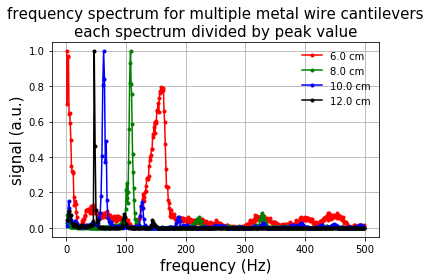

In [10]:
# plot a group of fft spectra...

title = 'frequency spectrum for multiple metal wire cantilevers\neach spectrum divided by peak value'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

for filename in filenames[:]:
    # if there is no metadata on this filename, then skip it...
    meta = label_dict.get(int(filename.strip('A')))
    if meta is None:
        continue
    fft_x = fft_data[filename]['fft_x']
    fft_y = fft_data[filename]['fft_y']
    # divide by max so FFT data can be displayed on same scale
    fft_y = fft_y/np.max(fft_y)
    plt.plot(fft_x,fft_y,'.-',color=meta.get('color'),
                 label='{} cm'.format(label_dict[int(filename.strip('A'))]['length']))

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=15)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.legend(frameon=False,loc='best') 
# plt.xlim([0,1000])
# plt.ylim([1,10000])
plt.tight_layout() 

# save the figure as a png file. It will be saved 
# to the same directory as your program.
plt.savefig('cantilever fft data.png',dpi=400)

In [11]:
# label_dict[int(filename.strip('A'))]['length']

Now we have plotted the FFT data for multiple frequencies. Let's try finding the peaks for each and confirm on the plot that we have found the peak for each:

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


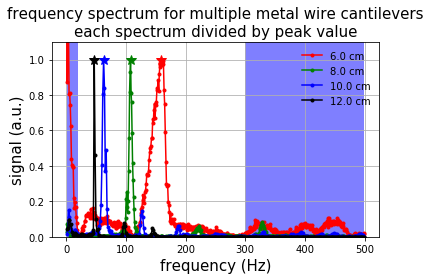

In [12]:
# finding peaks -- set range for search and verify star matches peak below:

# set the minimum and max values of frequency that you want to include in searching for a max...
begin_spectrum_analyze_idx = 10
fmin = 20 # Hz
fmax = 300 # Hz

for filename in filenames:
    # if there is no metadata on this filename, then skip it...
    meta = label_dict.get(int(filename.strip('A')))
    if meta is None:
        continue
    fft_x = fft_data[filename]['fft_x']
    fft_y = fft_data[filename]['fft_y']
    # convert the min and max frequencies to indices so we can searcha range for a max value...
    freqMinIndex = np.round(np.interp(fmin,fft_data[filename]['fft_x'],np.arange(len(fft_data[filename]['fft_x']))))
    freqMaxIndex = np.round(np.interp(fmax,fft_data[filename]['fft_x'],np.arange(len(fft_data[filename]['fft_x']))))
    # note the index corresponding to the max position...
    max_index = fft_y[freqMinIndex:freqMaxIndex].argmax()+freqMinIndex
    # divide by max so FFT data can be displayed on same scale
    fft_y = fft_y/np.max(fft_y[freqMinIndex:freqMaxIndex])
    # record the resonance frequencies by adding metadata to our data set...    
    fft_data[filename]['resonance_freq'] = fft_x[max_index]
    plt.plot(fft_x,fft_y,'.-',
             label='{} cm'.format(meta.get('length')),color=meta.get('color'))
    plt.plot(fft_x[max_index],fft_y[max_index],'*',markersize=10,color=meta.get('color'))

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=15)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

# shade out the region that we are ignoring for searching for max peak...
# plt.fill_between(fft_x, fmin, fmax, where=abs(RHS) < 1,facecolor='blue', alpha=0.5)
plt.axvspan(np.min(fft_x), fmin, color='b', alpha=0.5, lw=0)
plt.axvspan(fmax, np.max(fft_x), color='b', alpha=0.5, lw=0)

plt.legend(frameon=False,loc='best') 
# plt.xlim([0,2000])
plt.ylim([0,1.1])
plt.tight_layout() 

# save the figure as a png file. It will be saved 
# to the same directory as your program.
plt.savefig('cantilever fft data.png',dpi=400)

# i notice some division errors but this is unimportant right now... can't figure out where it is coming from...
# shaded out the region that we are ignoring...

In [13]:
# fft_data now contains fundamental resonance frequencies as metadata
fft_data['A0003']['resonance_freq'] 

62.856999999999999

In [14]:
resonance_freqs = [fft_data[k]['resonance_freq'] for k in filenames]
resonance_freqs

[159.0, 107.97, 62.856999999999999, 47.143000000000001]

In [15]:
label_dict.items()

dict_items([(1, {'length': 6.0, 'color': 'r'}), (2, {'length': 8.0, 'color': 'g'}), (3, {'length': 10.0, 'color': 'b'}), (4, {'length': 12.0, 'color': 'k'})])

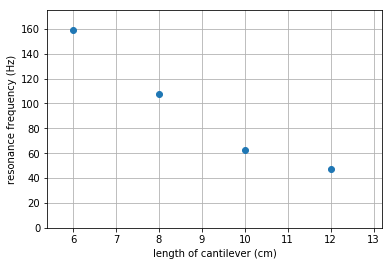

In [16]:
lengths = [v['length'] for k,v in label_dict.items()]
length_inv_sqrd = [(L*1e-2)**(-2) for L in lengths]


freqs = [fft_data['A{:04d}'.format(key)]['resonance_freq'] for key in label_dict.keys()]
plt.plot(lengths,freqs,'o')
plt.grid()
plt.xlim([min(lengths)*.9,max(lengths)*1.1])
plt.ylim([0,max(freqs)*1.1])
plt.xlabel('length of cantilever (cm)')
plt.ylabel('resonance frequency (Hz)')
plt.plot(length_inv_sqrd,resonance_freqs,'o',label='peak frequencies (extracted)')

This trend is more or less how we'd expect: longer cantilevers oscillate at lower frequencies. Like Hooke's law: more mass, lower resonance. Let's go a layer deeper and see whether the length scales as 1/length^2...

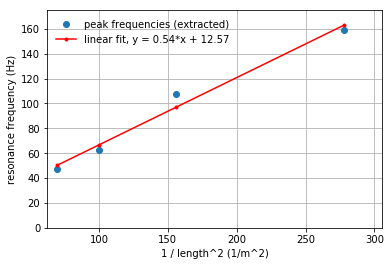

In [17]:
# p,cov = np.polyfit(x_values, y_values, 1,cov=True)  

length_inv_sqrd = np.asarray(length_inv_sqrd)
# p = np.polyfit(length_inv_sqrd[:],resonance_freqs[:],1)   # these are the polynomial coefficients for a linear-order polyomial
p = np.polyfit(length_inv_sqrd[:],resonance_freqs[:],1,cov=False)     # these are the polynomial coefficients for a linear-order polyomial


m = p[0]
b = p[1]
yfit = m*length_inv_sqrd + b    # constructing the array for the polynomial fit curve

# apparently number of points should be 5 or more in order for covariance to work (??)
# p,cov = np.polyfit(length_inv_sqrd[:],resonance_freqs[:],1,cov=True)     # these are the polynomial coefficients for a linear-order polyomial

# calculate error on fit parameters: the covariance   
# diagonal elements are what you want -- their sqrt makes it a standard deviation 
# http://stackoverflow.com/questions/27757732/find-uncertainty-from-polyfit  
# print(np.sqrt(np.diag(cov)))
# print("m error = ",np.sqrt(np.diag(cov))[0]) 
# print("b error = ",np.sqrt(np.diag(cov))[1])

plt.plot(length_inv_sqrd,resonance_freqs,'o',label='peak frequencies (extracted)')
plt.plot(length_inv_sqrd,yfit,'.-r',label='linear fit, y = %2.2f*x + %2.2f'%(m,b))
plt.grid()
plt.xlim([np.min(length_inv_sqrd[:])*.9,np.max(length_inv_sqrd[:])*1.1])
plt.ylim([0,np.max(resonance_freqs[:])*1.1])
plt.xlabel('1 / length^2 (1/m^2)')
plt.ylabel('resonance frequency (Hz)')
plt.legend(frameon=False,loc='best') 

In [18]:
len(length_inv_sqrd[:])

4

In [19]:
slope_fit = m
m

0.541320120409163

In [20]:
resonance_freqs

[159.0, 107.97, 62.856999999999999, 47.143000000000001]

Using a formula from this reference for the resonance frequencies of a cantilever:

http://iitg.vlab.co.in/?sub=62&brch=175&sim=1080&cnt=1

The natural frequencies are given by:

$$ \omega_{nf} = \alpha_n^2 \sqrt{\frac{E I}{\rho A L^4}},$$

where $I$ is the moment of inertia of the beam cross-section, $$I=\frac{\pi}{64}d^4,$$
where $d$ is the diameter of cross section. 

So if we extract the slope of the linear relationship $f_{1}$ (first resonant frequency, $n=1$) as a function of $1/L^2$, we can extract out the remaining parameters and thus solve for Young's modulus...

My basic strategy: 
* input diameter, density, slope coeff from linear fit (freq vs 1/length^2), and assume a cylindrical geometry --> output Young's modulus

In [21]:
d=1.0*10**-3     # diameter of cantilever in meters
rho = 2700       # kg/m^3
I=np.pi/64*d**4
A = np.pi*(d/2)**2


# textbook value of Young's modulus for steel:
E = 200e9 # N/m^2

In [22]:
# youngs_modulus = slope_fit*(1.875**2/(2*np.pi)*np.sqrt(I/(rho*A)))**(-1)
youngs_modulus = slope_fit**2*(2*np.pi)**2/(1.875**2)*rho*A/I
print("Our estimated value for Youngs modulus, \nbased on extraction from the data and comparison with a model, is:\n%2e N/m^2"%(youngs_modulus))
print("This value compares with the text book value for steel: E = %2.2e N/m^2"%E)

Our estimated value for Youngs modulus, 
based on extraction from the data and comparison with a model, is:
1.421508e+11 N/m^2
This value compares with the text book value for steel: E = 2.00e+11 N/m^2


Our estimated value of E is quite close to what we would expect for steel. Why is it not exactly? Perhaps different alloy... or the "kinks" in the paperclip make a nontrivial difference...

In [23]:
# going about it the other way... Guess Young's modulus for steel.. and work out what the resonant frequencies should be...
# E=0.69*10**11  # N/m^2
# textbook value of Young's modulus for steel:
E = 200e9 # N/m^2
E = youngs_modulus
L = 10e-2    # length of cantilever in meters

d=1.0e-3     # diameter of cantilever in meters
rho = 2700   # kg/m^3
I=np.pi/64*d**4
A = np.pi*(d/2)**2

freq_mult = (1/(2*np.pi))* np.sqrt(E*I/(rho*A*L**4))
freq1 = 1.875**2 * freq_mult
freq2 = 4.694**2 * freq_mult
freq3 = 7.855**2 * freq_mult
[freq1,freq2,freq3]

print("Estimated resonance frequencies for %.2f cm long cantilever"%(L*100))
print("Fundamental: %.2f Hz"%(freq1))
print("Second: %.2f Hz"%(freq2))
print("Third: %.2f Hz"%(freq3))

Estimated resonance frequencies for 10.00 cm long cantilever
Fundamental: 101.50 Hz
Second: 636.12 Hz
Third: 1781.33 Hz


So why doesn't the estimated resonance frequency (e.g., take the fundamental) for our extracted Young's modulus match well with the actual measured data? Perhaps this is because of the 1/L^2 dependence: 

In [24]:
1/1.1**2

0.8264462809917354

Note that being off by 10% on a measurement of L could mean a ~20% error in the overall frequency...
Noticing that 

$$\frac{f_{predicted}}{f_{measured}} = \frac{L^2_{measured}}{L^2_{predicted}}$$

I can back out what I expect L to "actually" be assuming that I have determined Young's modulus correctly...

In [25]:
np.sqrt(10**2/(100.18/66.372))

8.1395789239305234

So maybe my length was off by a couple cm? Seems doubtful. It seems that possibly:

(a) small systematic error in measuring L has converted into error in measuring E

(b) The Young's modulus that I measured is not correctly extracted from my measurements

(c) There are extra complications with my experiment beyond my simple approximation of the paper clip as a cylindrical cantilever.